First 5 rows of dataset:
    User ID  Area code            Location  Gender   YOB Marital Status  \
0        1        153  Upper East Side,NY  Female  2006         Single   
1        2        123       St. George,NY  Female  1991        Married   
2        3        122  Upper West Side,NY    Male  1977         Single   
3        4        153  Upper East Side,NY  Female  1956        Married   
4        5        129     Central Park,NY    Male  1997         Single   

       Activity  Budget  Cuisines  Alcohol     Smoker  Food Rating  \
0  Professional       3  Japanese     Never     Never            5   
1       Student       3    Indian     Never  Socially            1   
2       Student       5   Seafood     Often     Often            5   
3  Professional       5  Japanese     Never  Socially            3   
4       Student       4  Filipino  Socially     Never            2   

   Service Rating  Overall Rating Often A S  
0               4             4.5        No  
1               

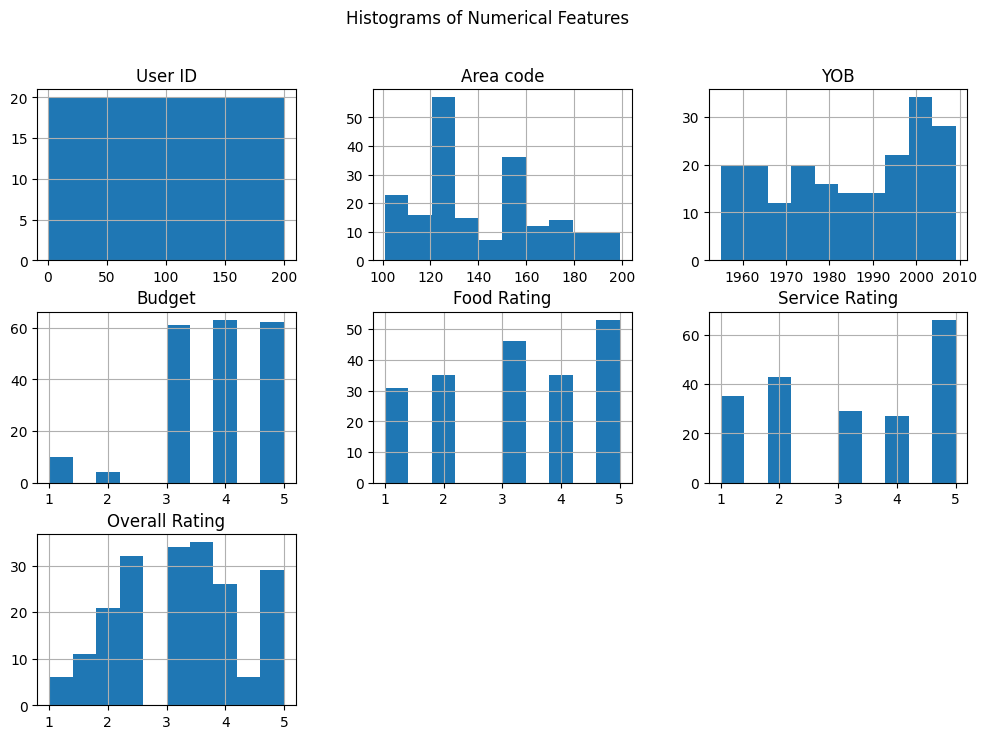

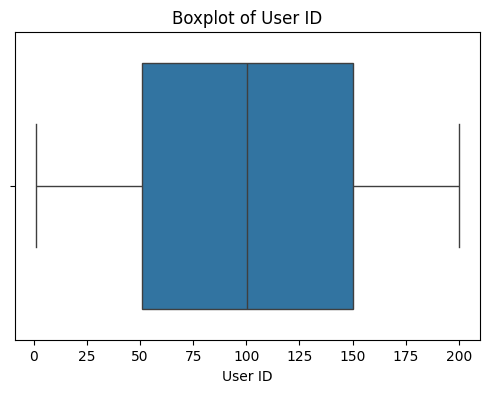

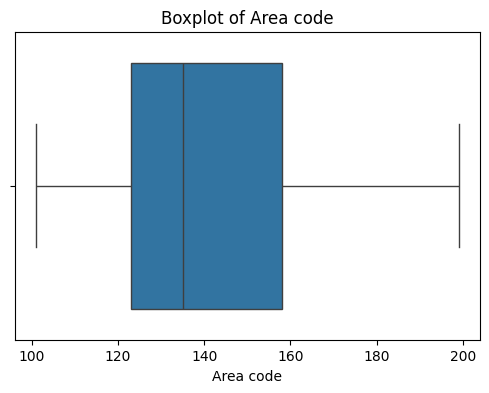

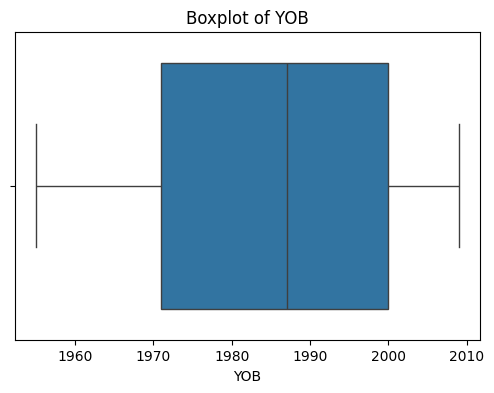

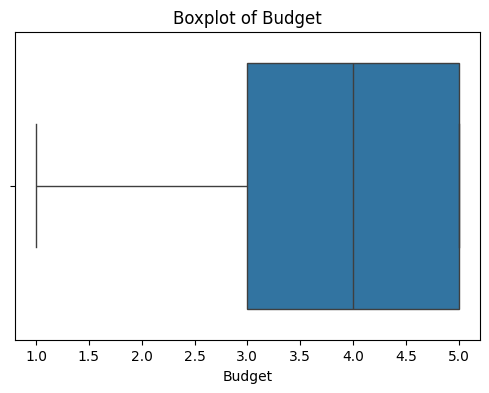

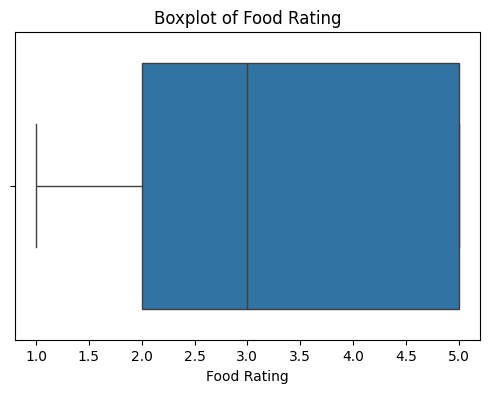

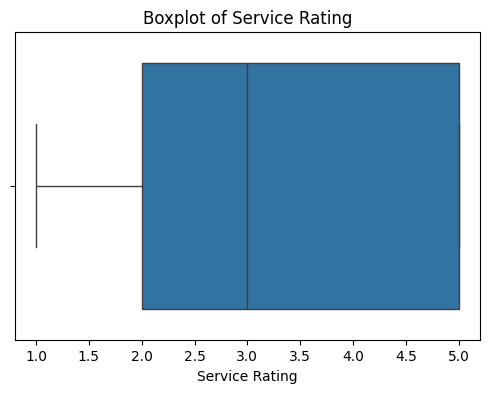

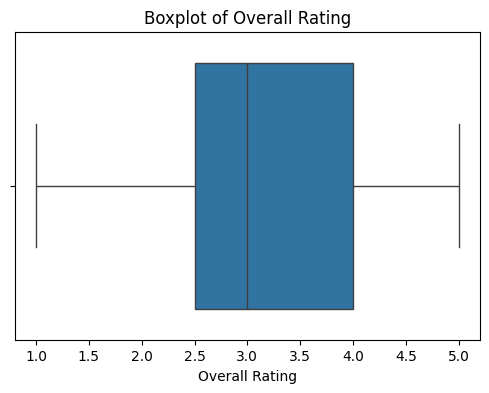

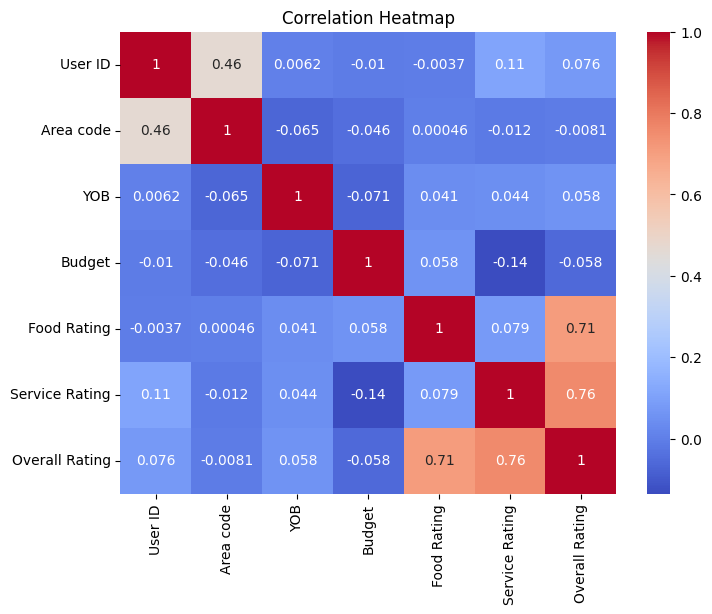

In [5]:
#EDA IN PYTHON.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_dataset(path=None):
    """Loads dataset from given path or asks user to select one."""
    if path and os.path.exists(path):
        return pd.read_csv(path)
    else:
        from tkinter import Tk
        from tkinter.filedialog import askopenfilename
        Tk().withdraw()
        print("Select a CSV dataset file:")
        file_path = askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            return pd.read_csv(file_path)
        else:
            raise FileNotFoundError("No file selected.")

def perform_eda(df):
    """Performs basic EDA automatically on any dataset."""
    # Show first rows
    print("First 5 rows of dataset:\n", df.head(), "\n")

    # Dataset info
    print("Dataset Information:")
    print(df.info())

    # Numerical & categorical features
    numerical_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()
    print("\nNumerical Features:", numerical_features)
    print("Categorical Features:", categorical_features)

    # Missing values
    print("\nMissing Values Summary:\n", df.isnull().sum())

    # Summary statistics
    if numerical_features:
        print("\nSummary Statistics for Numerical Features:\n", df.describe())

    # Detect outliers using IQR
    if numerical_features:
        print("\nOutlier Detection (IQR Method):")
        for col in numerical_features:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
            print(f"{col}: {len(outliers)} outliers")

    # Categorical value counts
    for col in categorical_features:
        print(f"\nValue Counts for {col}:\n", df[col].value_counts())

    # Histograms for numerical features
    if numerical_features:
        df[numerical_features].hist(figsize=(12, 8))
        plt.suptitle("Histograms of Numerical Features")
        plt.show()

    # Boxplots for numerical features
    for col in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

    # Correlation heatmap
    if len(numerical_features) > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()

# ==== MAIN EXECUTION ====
try:
    # Provide path here if known, else leave as None
    dataset_path =  "/content/Cuisine_rating.csv"
    df = load_dataset(dataset_path)
    perform_eda(df)
except Exception as e:
    print(f"Error: {e}")
